Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и палучить с помощью модели прогнозы результативного прознака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [ ]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

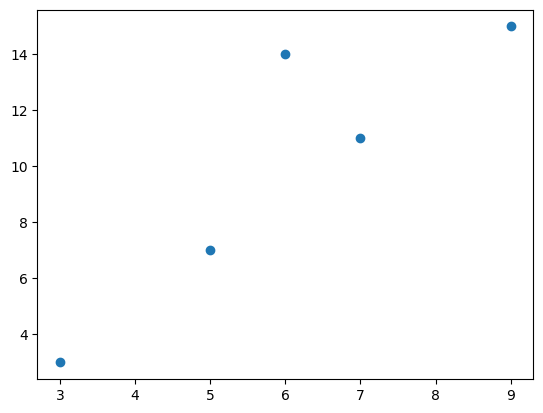

In [ ]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [ ]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [ ]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


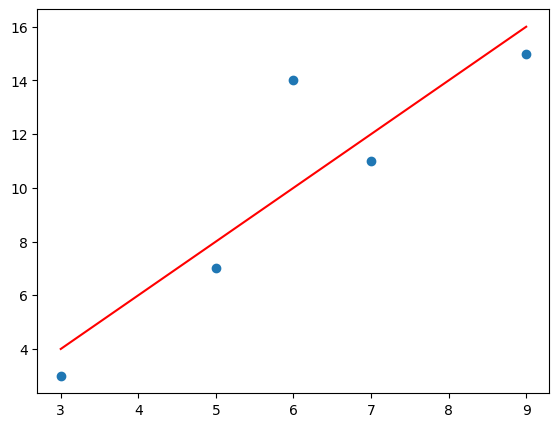

In [ ]:
#Изобразим на графике исходные данные и прогнозы
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [ ]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.1
        dT_a0 = -2*sum((Y -self.predict(x)))
        dT_a1 = -2*sum((Y -self.predict(x))*x)
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

In [ ]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


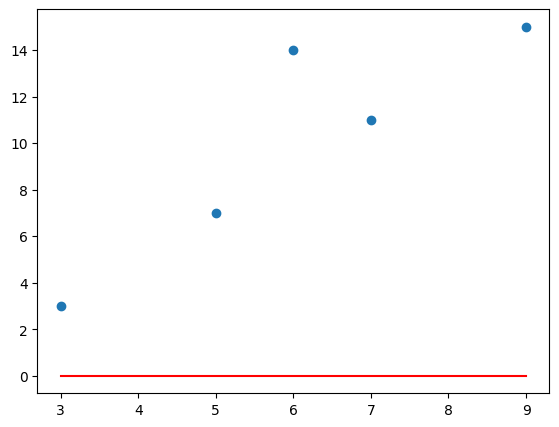

In [ ]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  183892.0


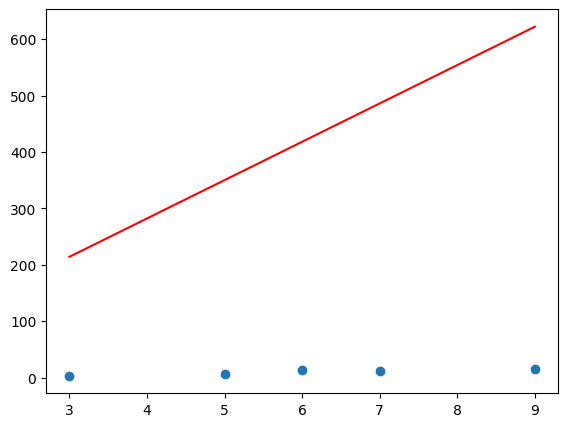

In [ ]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [ ]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 1, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [ ]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.1, epsylon = 1, max_steps = 1000)

<ipython-input-12-dcc49c3fe289>:9: RuntimeWarning: overflow encountered in square
  return ((Y - self.predict(x))**2).mean()
<ipython-input-12-dcc49c3fe289>:19: RuntimeWarning: overflow encountered in double_scalars
  dT_a1 = -2*sum((Y -self.predict(x))*x)
<ipython-input-12-dcc49c3fe289>:21: RuntimeWarning: invalid value encountered in double_scalars
  self.a1 -= alpha*dT_a1


nan
nan
nan
nan
nan
MSE после градиентного спуска:  nan


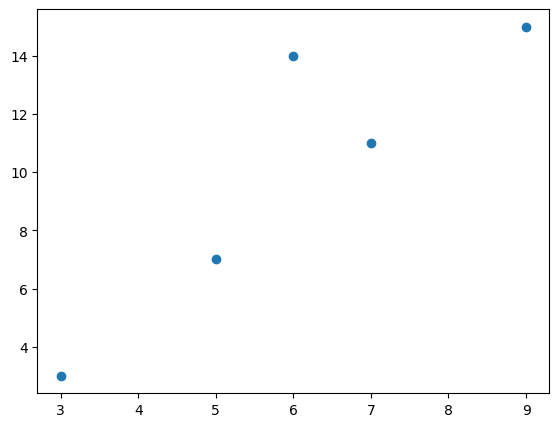

In [ ]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [ ]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

NameError: ignored

In [ ]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.1903709155046345


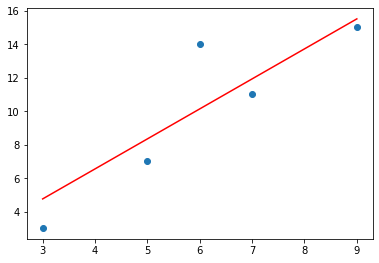

In [ ]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

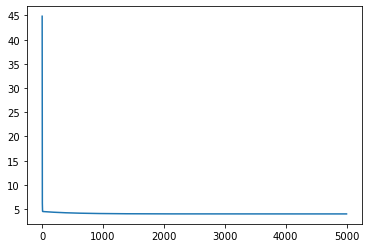

In [ ]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  4.1903709155046345


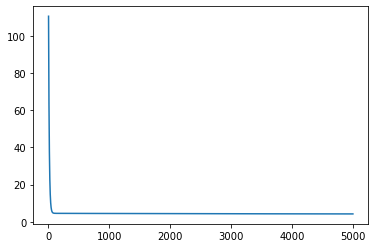

In [ ]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ...,
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)

Загрузите файл Video Games.csv (с помощью pd.read_csv).

Для 11 703 компьютерных игр известны платформа, год выхода, жанр, платформа, издатель, объемы продаж игры - отдельно для Северной Америки, Европы, Японии и других регионов.

В обучающей выборке для каждой игры известны следующие поля:

Name — название игры;
Platform — платформа (PC; DS; GBA; PS; PS2; PS3; PSP; Wii; XB или X360);
Year_of_Release — год выпуска;
Genre — жанр (Action; Adventure; Fighting; Platform; Puzzle; Racing; Role-Playing; Shooter; Simulation; Sports или Strategy; Misc означает все остальные жанры);
Publisher — издатель;
NA_Sales — объемы продаж игры в Северной Америке (в млн долл. США);
EU_Sales — объемы продаж игры в Европе(в млн долл. США);
Other_Sales — объемы продаж игры в других регионах (в млн долл. США);
Critic_Score — сумма оценок, данных игре штатными критиками сайта Metacritic;
Critic_Count — количество штатных критиков, давших оценки игре;
User_Score — сумма оценок, данных игре игры пользователями сайта Metacritic;
User_Count — количество пользователей, давших оценки;
Developer — разработчик;
Rating — рейтинг игры (AO — только для взрослых; 18+ M — только для лиц старше 18 лет; 17+ — только для лиц старше 17 лет; E10+ — для всех старше 10 лет; E — для всех; EC — для детей младшего возраста; RP — рейтинг не присвоен);
JP_Sales — объемы продаж игры в Японии (в млн долл. США).

Требуется построить модель, предсказывающую объем продаж игры в Японии.

Япония - достаточно специфичная страна с точки зрения индустрии развлечений. К тому же государство активно защищает своих производителей, что не способствует импорту. Перед издателями компьютерных игр всегда стоит вопрос: стоит ли игру переводить, подгонять под местный менталитет и платить для входа на японский рынок. Чтобы это понять, следует оценить, на какой кусок пирога можно вообще в Японии рассчитывать. Один из вариантов это сделать – по истории продаж в других регионах. Если игра еще в разработке, за историю продаж можно считать прогнозы: Европа и Америка не такие непредсказуемые рынки, как Япония.

Выберите в качестве результативного признака JP_Sales. В качестве факторных признаков выберите все числовые признаки. Также можно для категориальных признаков (Platform, Genre, возможно, Publisher) ввести индикаторы (с помощью sklearn.preprocessing.OneHotEncoder).

На основе класса SimpleRegression (в котором x - это одномерный массив значений факторного признака) создайте класс MultipleRegression, который реализует градиентный спуск для случая, когда x является двумерным массивом, содержащим в каждой строке (для кафдой компьютерной игры) значения нескольких факторных признаков.

Обучите модель с помощью метода MultipleRegressionюfit, дайте прогнозы JP_Sales^ для каждой игры с помощью MultipleRegression.predict, вычислите ошибки MAE и MAPE.

In [ ]:
videogames = pd.read_csv(r"Video Games.csv")
videogames.head()
#Y = videogames['jp_sales']
#x = videogames.drop('column_name', axis=1)
#Y.head()

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MultipleRegression(object):
    def __init__(self, num_features):
        self.coefficients = np.zeros((num_features + 1,))  # a0 + a1*x1 + a2*x2 + ... + an*xn (включая intercept)
        self.num_features = num_features

    def predict(self, X):
        X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
        return np.dot(X_with_intercept, self.coefficients)

    def MSE(self, X, Y):
        predictions = self.predict(X)
        return ((Y - predictions) ** 2).mean()

    def MAE(self, X, Y):
        predictions = self.predict(X)
        return np.abs(Y - predictions).mean()

    def MAPE(self, X, Y):
        predictions = self.predict(X)
        return np.abs((Y - predictions) / Y).mean()

    def fit(self, X, Y, alpha=0.0001, epsilon=0.001, max_steps=15000):
        steps, errors = [], []
        step = 0
        while step < max_steps:
            predictions = self.predict(X)
            errors.append(self.MSE(X, Y))
            X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
            gradient = -2 * np.dot(X_with_intercept.T, (Y - predictions)) / X.shape[0]
            self.coefficients -= alpha * gradient
            step += 1
            steps.append(step)
            if errors[-1] < epsilon:
                break
        return steps, errors

In [ ]:
def feature_scaling(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

In [ ]:
videogames = pd.read_csv("Video Games.csv")
X = videogames[['year', 'na_sales', 'eu_sales', 'other_sales']].values
X, mean_X, std_X = feature_scaling(X)
Y = videogames['jp_sales'].values

model = MultipleRegression(num_features=len(['year', 'na_sales', 'eu_sales', 'other_sales']))

steps, errors = model.fit(X, Y, alpha=0.01, epsilon=0.001)

plt.figure()
plt.plot(steps, errors)
plt.show()

for i in range(len(X)):
    mae = model.MAE(X[i:i+1], Y[i:i+1])
    mape = model.MAPE(X[i:i+1], Y[i:i+1])
    if i < 50:
      print(f'\nID[{videogames.id[i]}]:')
      print(mae)
      print(mape)



In [ ]:
Y_pred = model.predict(X)

In [ ]:
model.MSE(X, Y)

0.1673152560924493

In [ ]:
Y_pred = model.predict(X)
for i in range(len(Y_pred)):
  print(f'ID[{videogames.id[i]}] - Predicted:{Y_pred[i]} - Real:{videogames.jp_sales[i]}')

ID[2830] - Predicted:1.1455972583100886 - Real:1.0100000001483
ID[3865] - Predicted:1.3394567841869645 - Real:1.30999999972089
ID[4617] - Predicted:1.103447566979044 - Real:1.03999999984059
ID[3675] - Predicted:1.1371844112851346 - Real:1.07999999985298
ID[1612] - Predicted:0.9716888334563646 - Real:1.11999999965616
ID[1032] - Predicted:1.1004076162120746 - Real:1.02999999975121
ID[1775] - Predicted:1.1091922702648143 - Real:1.11999999965616
ID[2566] - Predicted:1.3210683866504345 - Real:1.49000000006352
ID[2185] - Predicted:1.3394567841869645 - Real:1.11999999965616
ID[1132] - Predicted:1.3026799891139045 - Real:1.03999999984059
ID[5971] - Predicted:1.2291263989677845 - Real:1.56999999943446
ID[2103] - Predicted:1.0268540260659547 - Real:1.0100000001483
ID[270] - Predicted:1.1555728088216646 - Real:1.10000000021524
ID[3532] - Predicted:0.9716888334563646 - Real:1.1300000003116
ID[3992] - Predicted:0.9716888334563646 - Real:1.0100000001483
ID[79] - Predicted:1.1952197168268364 - Real:1

In [ ]:
Попробуйте расширить набор факторных признаков, добавив логарифмы, квадраты, кубы